In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\vasub\\OneDrive\\Desktop\\Data Projects\\Day - 2\\Pandas-Data-Science-Tasks-master\\SalesAnalysis'

In [16]:
cd C:/Users/vasub/OneDrive/Desktop/Data Projects/Day - 2/Pandas-Data-Science-Tasks-master/SalesAnalysis

C:\Users\vasub\OneDrive\Desktop\Data Projects\Day - 2\Pandas-Data-Science-Tasks-master\SalesAnalysis


In [21]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 645F-EAD1

 Directory of C:\Users\vasub\OneDrive\Desktop\Data Projects\Day - 2\Pandas-Data-Science-Tasks-master\SalesAnalysis

03/10/2023  11:55 AM    <DIR>          .
03/10/2023  11:55 AM    <DIR>          ..
03/10/2023  11:42 AM    <DIR>          .ipynb_checkpoints
03/10/2023  11:55 AM             2,139 my_practice.ipynb
09/05/2020  11:09 PM    <DIR>          Output
09/05/2020  11:09 PM    <DIR>          Sales_Data
03/10/2023  11:42 AM           162,175 SalesAnalysis.ipynb
               2 File(s)        164,314 bytes
               5 Dir(s)  124,586,971,136 bytes free


In [17]:
pwd

'C:\\Users\\vasub\\OneDrive\\Desktop\\Data Projects\\Day - 2\\Pandas-Data-Science-Tasks-master\\SalesAnalysis'

In [24]:
for i in os.listdir('./Sales_Data'):
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### make an empty dataframe and append all these files into that dataframe with for loop

In [25]:
df = pd.DataFrame()

In [29]:
for i in os.listdir('./Sales_Data'):
    df = df.append(pd.read_csv('./Sales_Data/'+ i))

In [32]:
df.to_csv("all_month_sales.csv",index = False)

In [71]:
df = pd.read_csv("all_month_sales.csv")

In [72]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [74]:
df = df[df['Order Date']!='Order Date']

In [75]:
df['Order Date'].value_counts()

12/15/19 20:16    8
12/11/19 13:24    7
10/30/19 21:28    7
04/02/19 13:24    7
05/08/19 19:29    6
                 ..
04/14/19 09:26    1
08/06/19 20:59    1
01/18/19 00:02    1
03/20/19 22:34    1
09/06/19 21:50    1
Name: Order Date, Length: 142395, dtype: int64

In [76]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 10.0+ MB


In [78]:
df['Order Date'].dt.month

0         4.0
1         NaN
2         4.0
3         4.0
4         4.0
         ... 
186845    9.0
186846    9.0
186847    9.0
186848    9.0
186849    9.0
Name: Order Date, Length: 186495, dtype: float64

In [79]:
import seaborn as sns

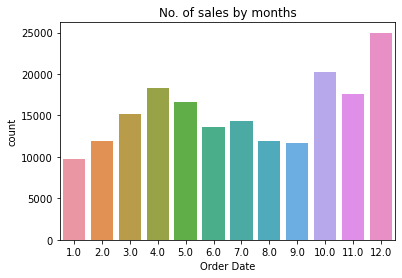

In [110]:
sns.countplot(df['Order Date'].dt.month)
plt.title('No. of sales by months');

In [81]:
df['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [82]:
df[['Quantity Ordered','Price Each']] = df[['Quantity Ordered','Price Each']].apply(pd.to_numeric) ;

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 14.0+ MB


In [84]:
df['SalesAmount'] = df['Quantity Ordered'] * df['Price Each']

In [85]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99


## Q) which month has the highest sales ?
- it could be relevant to know for the business as they would want to plan inventory accordingly to avoid stockouts 
- also could plan on discounts strategy based on sales trends 

In [86]:
df['Order Date'].dt.month.value_counts()

12.0    24984
10.0    20282
4.0     18279
11.0    17573
5.0     16566
3.0     15153
7.0     14293
6.0     13554
2.0     11975
8.0     11961
9.0     11621
1.0      9709
Name: Order Date, dtype: int64

In [153]:
pd.set_option('display.float_format', '{:.2f}'.format)
# important# important# important# important# important# important# important# important# important# important# important

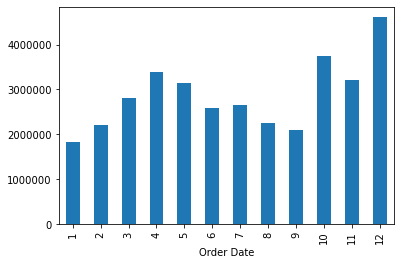

In [154]:
plt.figure()
plt.ticklabel_format(style='plain') # important # important# important# important# important# important# important
df.groupby(by=df['Order Date'].dt.month).sum()['SalesAmount'].plot(kind='bar');
# ax.bar_label(ax.containers[0])
# plt.ticklabel_format(style='plain');

- December has the highest sales and jan has the lowest

In [116]:
df.groupby(by=df['Order Date'].dt.month).sum()['SalesAmount'].sort_values(ascending=False)

Order Date
12.00   4613443.34
10.00   3736726.88
4.00    3390670.24
11.00   3199603.20
5.00    3152606.75
3.00    2807100.38
7.00    2647775.76
6.00    2577802.26
8.00    2244467.88
2.00    2202022.42
9.00    2097560.13
1.00    1822256.73
Name: SalesAmount, dtype: float64

In [127]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
356,NaN,NaN,NaN,NaN,NaT,NaN,NaN
735,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaT,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaT,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaT,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [129]:
df = df.dropna()

In [130]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount
0,176558,USB-C Charging Cable,2.00,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.00,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.00,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.00,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.00,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1.00,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


## Q) which city has the highest sales ?
-- asking this could be relevant as could be used in planning warehouses near places where sales are high

In [138]:
df['City'] = df['Purchase Address'].str.split(',').str[-2]

- cities from 2 countries could have same name and groupby will group together sales from different countries (in our case portland comes in 2 states)

In [148]:
def get_state(address):
    return address.split(',')[-1].strip()[:2]

In [149]:
df['State'] = df['Purchase Address'].apply(lambda x : get_state(x))

In [150]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount,City,State
0,176558,USB-C Charging Cable,2.00,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1.00,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston,MA
3,176560,Google Phone,1.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,CA
4,176560,Wired Headphones,1.00,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,CA
5,176561,Wired Headphones,1.00,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.00,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,Los Angeles,CA
186846,259354,iPhone,1.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,San Francisco,CA
186847,259355,iPhone,1.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1.00,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,San Francisco,CA


In [152]:
df.groupby(by=['City','State']).sum().sort_values('SalesAmount',ascending=False)

,,Quantity Ordered,Price Each,SalesAmount
City,State,,,
San Francisco,CA,50239.00,8211461.74,8262203.91
Los Angeles,CA,33289.00,5421435.23,5452570.80
New York City,NY,27932.00,4635370.83,4664317.43
Boston,MA,22528.00,3637409.77,3661642.01
Atlanta,GA,16602.00,2779908.20,2795498.58
Dallas,TX,16730.00,2752627.82,2767975.40
Seattle,WA,16553.00,2733296.01,2747755.48
Portland,OR,11303.00,1860558.22,1870732.34
Austin,TX,11153.00,1809873.61,1819581.75


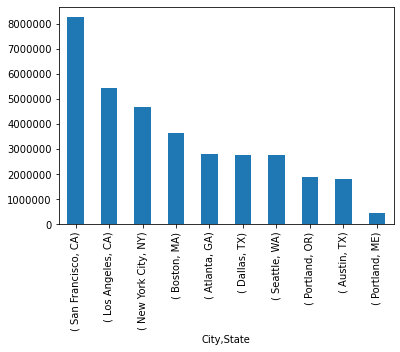

In [157]:
plt.figure()
plt.ticklabel_format(style='plain')
df.groupby(by=['City','State']).sum().sort_values('SalesAmount',ascending=False)['SalesAmount'].plot(kind='bar');

## Q) which time should we display our advertisments ?
- We can visualize how the orders trend is like for 24Hrs , this can help us get the most out of the ad cost , if spent on strategic time

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   SalesAmount       185950 non-null  float64       
 7   City              185950 non-null  object        
 8   State             185950 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 18.2+ MB


In [160]:
df['Hour'] = df['Order Date'].dt.hour

In [164]:
df.groupby(by='Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount,City,State
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


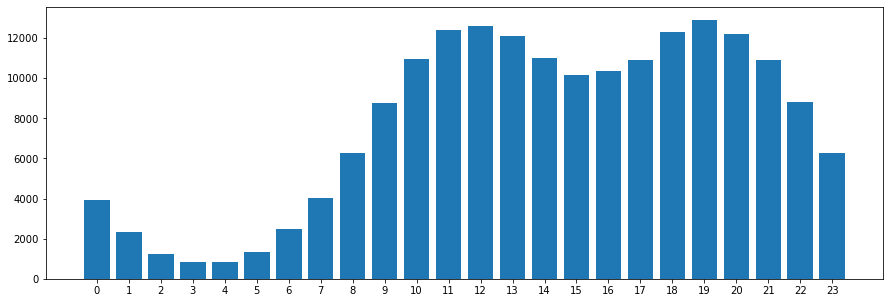

In [188]:
plt.figure(figsize=(15,5))
hours = [hour for hour,df in df.groupby(by='Hour')]

# above step is done because by defualt if we put column.unique in x-axis label 
# then it does not set axis by order and results could be deceiving

plt.bar(hours,df.groupby(by='Hour').count()['Order ID'])
plt.xticks(hours);

In [180]:
df.groupby(by='Hour').count()['Order ID'].sort_values(ascending = False)

Hour
19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Order ID, dtype: int64

### Conclusion - Maybe it would be a great idea to put ads just before peak times like 10am at around 6pm

#### 🤔 Also we can come up with ad time recommendation for all cities maybe the pattern in all cities is not exactly the same ?

- Let's do this for most order driving 5 cities and see if the order pattern look any different for those cities

In [206]:
df.groupby(by=['State','City']).count()[['Order Date']].sort_values(ascending=False,by='Order Date').head()

Order Date
State City                      
CA     San Francisco       44732
       Los Angeles         29605
NY     New York City       24876
MA     Boston              19934
GA     Atlanta             14881

In [226]:
df['City'] = df['City'].str.strip() # as there are whitespaces before city name

- subsetting df to only have cities with highest order volume

In [233]:
cities = ['San Francisco','Los Angeles','New York City','Boston','Atlanta']
df_top_orders = df.loc[df['City'].isin(['San Francisco','Los Angeles','New York City','Boston','Atlanta'])]

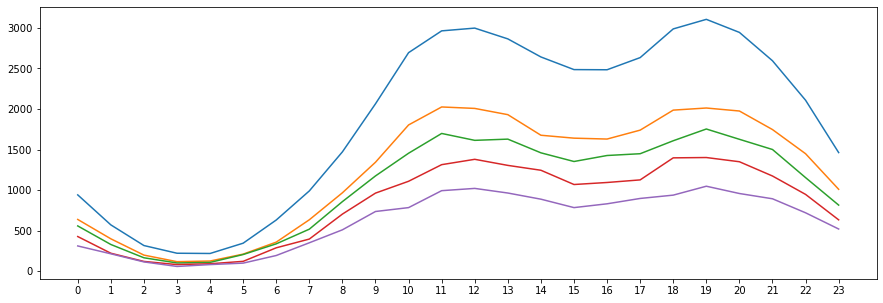

In [252]:
plt.figure(figsize=(15,5))

hours = [hour for hour,df in df_top_orders.groupby(by='Hour')]

# above step is done because by defualt if we put column.unique in x-axis label 
# then it does not set axis by order and results could be deceiving

plt.plot(hours,df_top_orders[df_top_orders['City'] == 'San Francisco'].groupby(by='Hour').count()['Order ID'])
plt.plot(hours,df_top_orders[df_top_orders['City'] == 'Los Angeles'].groupby(by='Hour').count()['Order ID'])
plt.plot(hours,df_top_orders[df_top_orders['City'] == 'New York City'].groupby(by='Hour').count()['Order ID'])
plt.plot(hours,df_top_orders[df_top_orders['City'] == 'Boston'].groupby(by='Hour').count()['Order ID'])
plt.plot(hours,df_top_orders[df_top_orders['City'] == 'Atlanta'].groupby(by='Hour').count()['Order ID'])

plt.xticks(hours);

- We see that pattern more or less remains the same for top 5 cities

### Q) What products are sold together ?

- Solving for this can be benefecial to business as we could club discounts and build strategies on cross selling ,if we get to know about buying patterns

### Approach 
 - Let's first filter for those orders that had more products in one order

In [254]:
df['Order ID'].nunique()

178437

In [258]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount,City,State,Hour
0,176558,USB-C Charging Cable,2.00,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1.00,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston,MA,22
3,176560,Google Phone,1.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1.00,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1.00,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,CA,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.00,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,Los Angeles,CA,20
186846,259354,iPhone,1.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,San Francisco,CA,16
186847,259355,iPhone,1.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,San Francisco,CA,7
186848,259356,34in Ultrawide Monitor,1.00,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,San Francisco,CA,17


In [274]:
 products_in_order = df.groupby('Order ID').count()[['Product']]

In [276]:
multiple_products = products_in_order[products_in_order['Product'] > 1]

In [281]:
multiple_products.reset_index(inplace=True)

In [282]:
multiple_products

,Order ID,Product
0,141275,2
1,141290,2
2,141365,2
3,141384,2
4,141450,2
...,...,...
7131,319536,2
7132,319556,2
7133,319584,2
7134,319596,2


In [283]:
multiple_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order ID  7136 non-null   object
 1   Product   7136 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 111.6+ KB


In [285]:
df.merge(multiple_products,on='Order ID')

,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount,City,State,Hour,Product_y
0,176560,Google Phone,1.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,CA,14,2
1,176560,Wired Headphones,1.00,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,CA,14,2
2,176574,Google Phone,1.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles,CA,19,2
3,176574,USB-C Charging Cable,1.00,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles,CA,19,2
4,176585,Bose SoundSport Headphones,1.00,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston,MA,11,2
...,...,...,...,...,...,...,...,...,...,...,...
14644,259303,AA Batteries (4-pack),1.00,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,Atlanta,GA,20,2
14645,259314,Wired Headphones,1.00,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,Atlanta,GA,0,2
14646,259314,AAA Batteries (4-pack),2.00,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,Atlanta,GA,0,2
14647,259350,Google Phone,1.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,San Francisco,CA,13,2


#### Above, this brings us all the orders that had multiple orders , better and easier way to do the same 👇

In [292]:
purchase_together = df[df['Order ID'].duplicated(keep=False)]

In [294]:
purchase_together.reset_index(inplace=True)

In [305]:
purchase_together

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,SalesAmount,City,State,Hour
0,3,176560,Google Phone,1.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,CA,14
1,4,176560,Wired Headphones,1.00,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,CA,14
2,18,176574,Google Phone,1.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles,CA,19
3,19,176574,USB-C Charging Cable,1.00,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles,CA,19
4,30,176585,Bose SoundSport Headphones,1.00,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston,MA,11
...,...,...,...,...,...,...,...,...,...,...,...
14644,186792,259303,AA Batteries (4-pack),1.00,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,Atlanta,GA,20
14645,186803,259314,Wired Headphones,1.00,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,Atlanta,GA,0
14646,186804,259314,AAA Batteries (4-pack),2.00,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,Atlanta,GA,0
14647,186841,259350,Google Phone,1.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,San Francisco,CA,13


In [317]:
first_items = purchase_together.drop_duplicates(subset=['Order ID']) 
# by default it saves the first ocurrence(in our case first product) and removes the rest

In [318]:
rest_items = purchase_together[purchase_together['Order ID'].duplicated()]
#This gets us all rest items that were purchased 

In [321]:
bought_together = pd.merge(first_items[['Order ID','Product']],rest_items[['Order ID','Product']],on='Order ID',
                           suffixes=('_first', '_next'))
bought_together

,Order ID,Product_first,Product_next
0,176560,Google Phone,Wired Headphones
1,176574,Google Phone,USB-C Charging Cable
2,176585,Bose SoundSport Headphones,Bose SoundSport Headphones
3,176586,AAA Batteries (4-pack),Google Phone
4,176672,Lightning Charging Cable,USB-C Charging Cable
...,...,...,...
7508,259297,iPhone,Lightning Charging Cable
7509,259297,iPhone,Lightning Charging Cable
7510,259303,34in Ultrawide Monitor,AA Batteries (4-pack)
7511,259314,Wired Headphones,AAA Batteries (4-pack)


In [328]:
bought_together.groupby(['Product_first','Product_next']).count().sort_values('Order ID',ascending=False).head(20)

Order ID
Product_first            Product_next                        
iPhone                   Lightning Charging Cable        1005
Google Phone             USB-C Charging Cable             987
iPhone                   Wired Headphones                 447
Google Phone             Wired Headphones                 414
Vareebadd Phone          USB-C Charging Cable             361
iPhone                   Apple Airpods Headphones         360
Google Phone             Bose SoundSport Headphones       220
Vareebadd Phone          Wired Headphones                 143
                         Bose SoundSport Headphones        80
Lightning Charging Cable USB-C Charging Cable              55
                         AA Batteries (4-pack)             52
AA Batteries (4-pack)    Lightning Charging Cable          51
Lightning Charging Cable Lightning Charging Cable          51
AAA Batteries (4-pack)   USB-C Charging Cable              50
                         AAA Batteries (4-pack)            48
AA Batteries (4-pack)    AAA Batteries (4-pack)            48
USB-C Charging Cable     USB-C Charging Cable              46
Apple Airpods Headphones AAA Batteries (4-pack)            45
AA Batteries (4-pack)    Wired Headphones                  44
AAA Batteries (4-pack)   Lightning Charging Cable          44

### Another method to achieve above with added flexibility to see more than 2 items together

In [335]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df1 = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df1['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df1[['Order ID', 'Grouped']].drop_duplicates()

In [341]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) 
    # here changing 2 to 3 will give us frequently bought 3 products at once

for key,value in count.most_common(20):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

### Q) What product sold the most

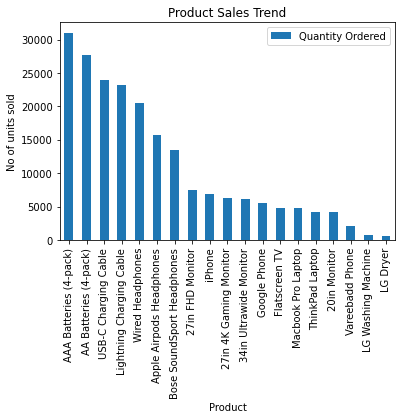

In [370]:
df.groupby('Product').sum()[['Quantity Ordered']].sort_values('Quantity Ordered',ascending=False).plot(kind='bar')
plt.title('Product Sales Trend')
plt.ylabel('No of units sold');

In [381]:
product = [pair for pair, df in df.groupby('Product')]

In [382]:
product

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [384]:
quantity_ordered = df.groupby('Product').sum()['Quantity Ordered']

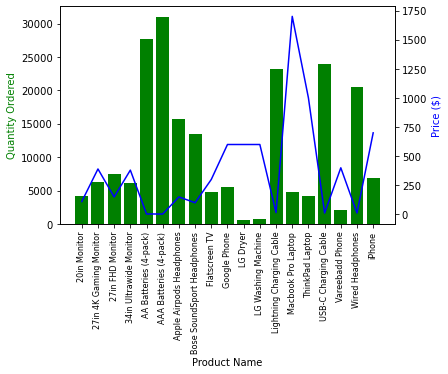

In [385]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color='g')
ax2.plot(product, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)

fig.show()